In [8]:
# imports
import pandas as pd
import matplotlib.pyplot as plt

# importing library
from PyPulseHeatPipe import PulseHeatPipe, DataVisualisation

## DI vs Al2O3 40FR 80W

In [11]:
# data loading from already calculated csv files

# data loading for DI Water
csv_file_path_mean_di = "data/di_water_exp/40_FR/combined_mean.csv"
csv_file_path_std_di = "data/di_water_exp/40_FR/combined_std.csv"
csv_file_path_gfe = "data/al2o3_diwater_exp/40_FR/gfe_combined.csv"

df_mean_di = pd.read_csv(csv_file_path_mean_di)
df_std_di = pd.read_csv(csv_file_path_std_di)
df_gfe_di = pd.read_csv(csv_file_path_gfe)

# data loading for NF
csv_file_path_mean = "data/al2o3_diwater_exp/40_FR/combined_mean.csv"
csv_file_path_std = "data/al2o3_diwater_exp/40_FR/combined_std.csv"

df_mean_nf = pd.read_csv(csv_file_path_mean)
df_std_nf = pd.read_csv(csv_file_path_std)

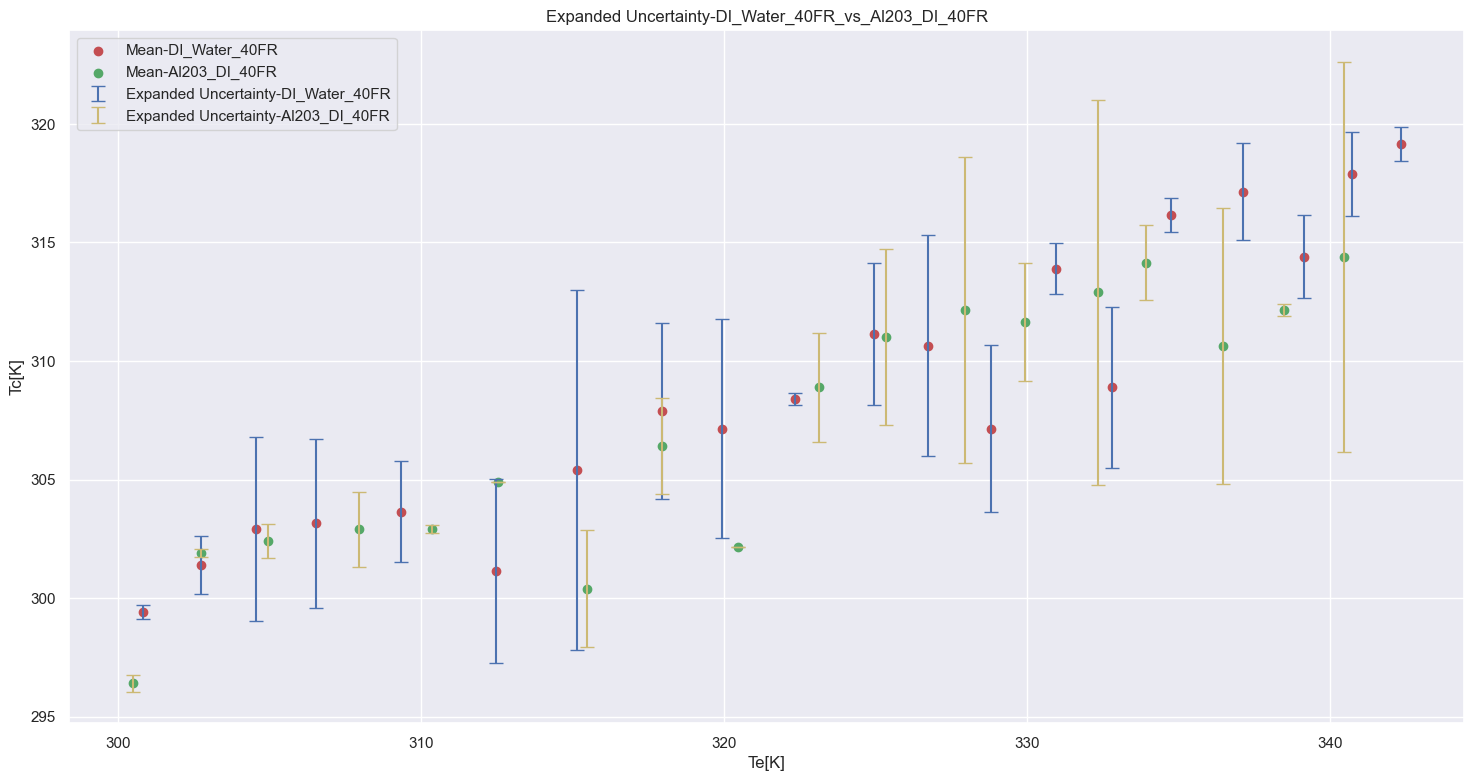

In [101]:
## subploting structure
plt.figure(figsize=(18,9))

# step for data selection 
steps = 5

## defining variable for subplot 2,1,1
x = 'Te[K]'
y = 'Tc[K]'
sample_nf = 'Al203_DI_40FR'
sample_di = 'DI_Water_40FR'

## First plot DIWATER
df_mean = df_mean_di # NOTE: select correct input variable DI Water
df_std = df_std_di

idx = df_std.index
df_mean_idxx = df_mean.loc[idx]

frames=[]
frames_std=[]
for i in range(0, df_mean_idxx.shape[0], steps):
    frames.append(df_mean_idxx.iloc[i, :])
    frames_std.append(df_std.iloc[i, :])
    df_mean_idx = pd.concat(frames, axis=1)
    df_std_ = pd.concat(frames_std, axis=1)
    df_std_ = df_std_.T
    df_mean_idx = df_mean_idx.T
    

plt.scatter(x=df_mean_idx[x], y=df_mean_idx[y], c='r', label=f"Mean-{sample_di}")
plt.errorbar(x=df_mean_idx[x], y=df_mean_idx[y], yerr=df_std_[y], fmt=" ", ecolor='b', capsize=5, label=f"Expanded Uncertainty-{sample_di}")


#NOTE: Plot Overlapping with NANOFluid Sample
df_mean = df_mean_nf # NOTE: select correct input variable NANOFLUID
df_std = df_std_nf

idx = df_std.index
df_mean_idxx = df_mean.loc[idx]

frames=[]
frames_std=[]
for i in range(0, df_mean_idxx.shape[0], steps):
    frames.append(df_mean_idxx.iloc[i, :])
    frames_std.append(df_std.iloc[i, :])
    df_mean_idx = pd.concat(frames, axis=1)
    df_std_ = pd.concat(frames_std, axis=1)
    df_std_ = df_std_.T
    df_mean_idx = df_mean_idx.T

plt.scatter(x=df_mean_idx[x], y=df_mean_idx[y], c='g', label=f"Mean-{sample_nf}")
plt.errorbar(x=df_mean_idx[x], y=df_mean_idx[y], yerr=df_std_[y], fmt=" ", ecolor='y', capsize=5, label=f"Expanded Uncertainty-{sample_nf}")

plt.xlabel(x)
plt.ylabel(y)
plt.title(f"Expanded Uncertainty-{sample_di}_vs_{sample_nf}")
plt.legend()

plt.savefig(f"data/al2o3_diwater_exp/40_FR/{sample_di}_vs_{sample_nf}.pdf")

In [97]:
df_mean_idx

,Unnamed: 0,Te[K],t(min),Tc[K],dT[K],P[bar],TR[K/W],GFE [KJ/mol],GFE_Tc [KJ/mol],dG [KJ/mol]
0,0,300.483333,2.5,296.40,4.083333,0.313307,0.051042,-2899.358256,-2859.958246,-39.400010
1,1,301.150000,0.0,301.15,0.000000,0.313307,0.000000,-2905.790910,-2905.790910,0.000000
2,2,301.750000,0.5,301.15,0.600000,0.313307,0.007500,-2911.580299,-2905.790910,-5.789389
3,3,302.150000,3.0,296.65,5.500000,0.313307,0.068750,-2915.439892,-2862.370492,-53.069401
4,4,302.550000,0.0,302.15,0.400000,0.346638,0.005000,-2665.002242,-2661.478854,-3.523388
...,...,...,...,...,...,...,...,...,...,...
84,84,339.750000,11.5,317.65,22.100000,0.429964,0.276250,-2386.303516,-2230.918447,-155.385068
85,85,340.483333,14.0,314.40,26.083333,0.479960,0.326042,-2077.938113,-1918.753956,-159.184157
86,86,340.550000,12.5,317.90,22.650000,0.479960,0.283125,-2078.344973,-1940.114130,-138.230843
87,87,340.950000,13.5,317.65,23.300000,0.479960,0.291250,-2080.786136,-1938.588403,-142.197733


In [89]:
frames=[]
for i in range(0, df_mean_idx.shape[0], 10):
    frames.append(df_mean_idx.iloc[i, :])
    df = pd.concat(frames, axis=1)
    